In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ufc-fighters-statistics/ufc-fighters-statistics.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

series

In [3]:
#import data
df = pd.read_csv('../input/ufc-fighters-statistics/ufc-fighters-statistics.csv')


In [7]:
#check total rows and columns
df.shape

(4111, 18)

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [9]:
df.columns

Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')

In [6]:
df.dtypes

name                                             object
nickname                                         object
wins                                              int64
losses                                            int64
draws                                             int64
height_cm                                       float64
weight_in_kg                                    float64
reach_in_cm                                     float64
stance                                           object
date_of_birth                                    object
significant_strikes_landed_per_minute           float64
significant_striking_accuracy                   float64
significant_strikes_absorbed_per_minute         float64
significant_strike_defence                      float64
average_takedowns_landed_per_15_minutes         float64
takedown_accuracy                               float64
takedown_defense                                float64
average_submissions_attempted_per_15_minutes    

In [11]:
df.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [14]:
df = df[['name',
         #'nickname',
         'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm',
         #'stance',
         'date_of_birth',
       #'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       #'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       #'average_takedowns_landed_per_15_minutes', 
       'takedown_accuracy',
       #'takedown_defense', 'average_submissions_attempted_per_15_minutes'
        ]]

In [39]:
#get all dates in one format
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Ensure other columns are of correct type
df['height_cm'] = pd.to_numeric(df['height_cm'])
df['weight_in_kg'] = pd.to_numeric(df['weight_in_kg'])


In [40]:
df.head(10)

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,date_of_birth,significant_striking_accuracy,takedown_accuracy
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,1994-09-29,60.0,100.0
8,Will Kerr,9,3,0,177.80,70.31,175.26,1982-10-21,42.0,0.0
11,Bo Nickal,5,0,0,185.42,83.91,193.04,1996-01-14,62.0,50.0
17,Westin Wilson,16,8,0,185.42,65.77,185.42,1989-01-24,50.0,0.0
22,Dione Barbosa,6,2,0,167.64,56.70,167.64,1992-05-08,50.0,100.0
23,Zach Reese,6,1,0,193.04,83.91,195.58,1994-03-24,66.0,0.0
25,Justin Burlinson,6,1,0,185.42,77.11,187.96,1997-05-19,40.0,0.0
42,Paul Sass,14,2,0,182.88,70.31,185.42,1988-08-04,26.0,16.0
49,Jinnosuke Kashimura,4,2,0,170.18,70.31,180.34,2001-08-12,50.0,100.0
53,John Albert,6,5,0,172.72,61.23,172.72,1986-10-13,49.0,0.0


In [16]:
#finds how many null values are present
df.isna().sum()

name                                0
wins                                0
losses                              0
draws                               0
height_cm                         298
weight_in_kg                       87
reach_in_cm                      1927
date_of_birth                    1135
significant_striking_accuracy       0
takedown_accuracy                   0
dtype: int64

In [23]:
#removes the rows with null values 
df = df.loc[~df[['height_cm', 'weight_in_kg', 'reach_in_cm', 'date_of_birth']].isna().any(axis=1)]


In [24]:
#to find duplicate names
df.loc[df.duplicated(subset=['name'])].head(5)

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,date_of_birth,significant_striking_accuracy,takedown_accuracy
2089,Joey Gomez,7,1,0,177.80,70.31,180.34,1989-08-29,49.0,28.0
2560,Bruno Silva,23,10,0,182.88,83.91,187.96,1989-07-13,51.0,27.0


In [29]:
# Checking actual duplicate
df.query('name == "Joey Gomez"')
#this is not a duplicate

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,date_of_birth,significant_striking_accuracy,takedown_accuracy
1932,Joey Gomez,6,2,0,177.8,61.23,185.42,1986-07-21,28.0,100.0
2089,Joey Gomez,7,1,0,177.8,70.31,180.34,1989-08-29,49.0,28.0


In [28]:
# Checking actual duplicate
df.query('name == "Bruno Silva"')
#this is not a duplicate

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,date_of_birth,significant_striking_accuracy,takedown_accuracy
1478,Bruno Silva,13,5,2,162.56,56.70,165.10,1990-03-16,46.0,30.0
2560,Bruno Silva,23,10,0,182.88,83.91,187.96,1989-07-13,51.0,27.0


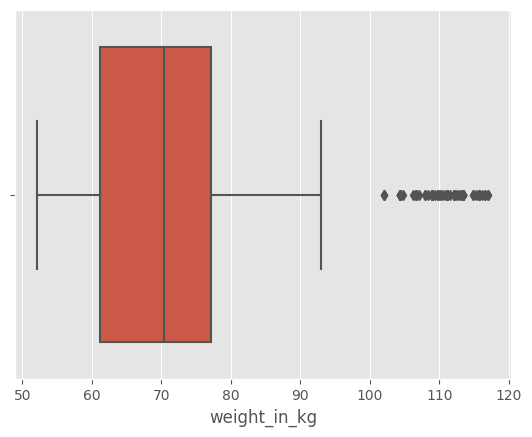

In [52]:
#to find outlires in weight
sns.boxplot(x=df['weight_in_kg'])
plt.show()

In [53]:
#removing the outliers
Q1 = df['weight_in_kg'].quantile(0.25)
Q3 = df['weight_in_kg'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['weight_in_kg'] >= (Q1 - 1.5 * IQR)) & (df['weight_in_kg'] <= (Q3 + 1.5 * IQR))]

In [54]:
df.shape

(2010, 10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


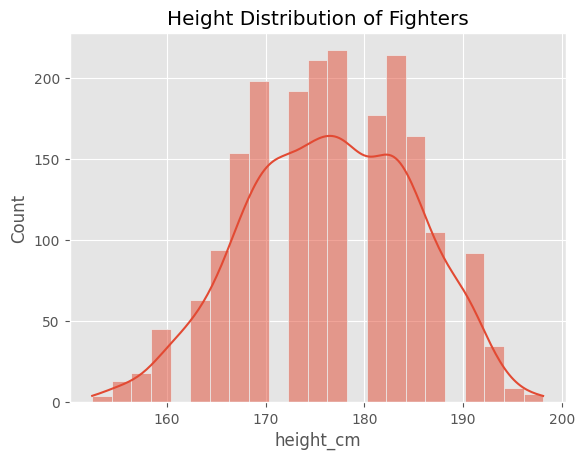

In [59]:
#height destribution
sns.histplot(df['height_cm'], kde=True)
plt.title('Height Distribution of Fighters')
plt.show()

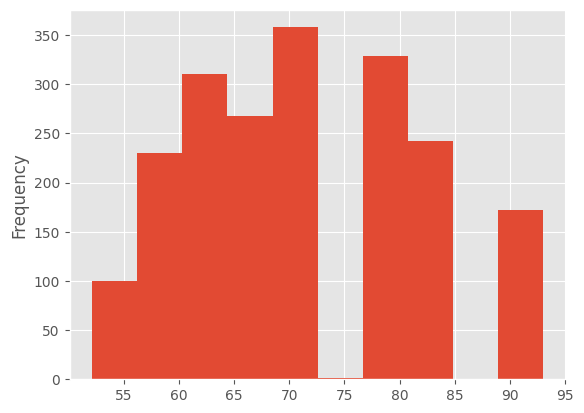

In [67]:
#weight destribution
df['weight_in_kg'].plot(kind='hist')
plt.show()

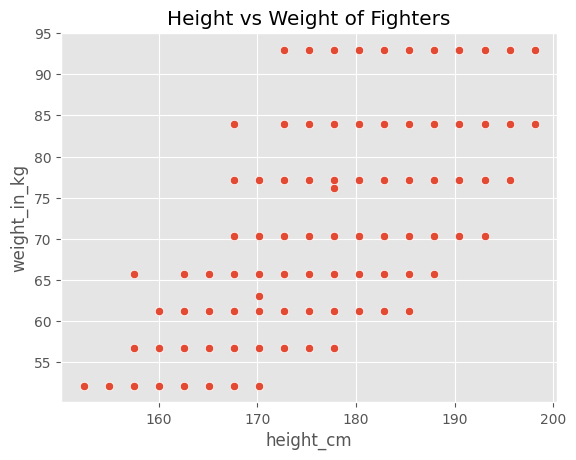

In [68]:
#Height vs Weight of Fighters
sns.scatterplot(x=df['height_cm'], y=df['weight_in_kg'])
plt.title('Height vs Weight of Fighters')
plt.show()

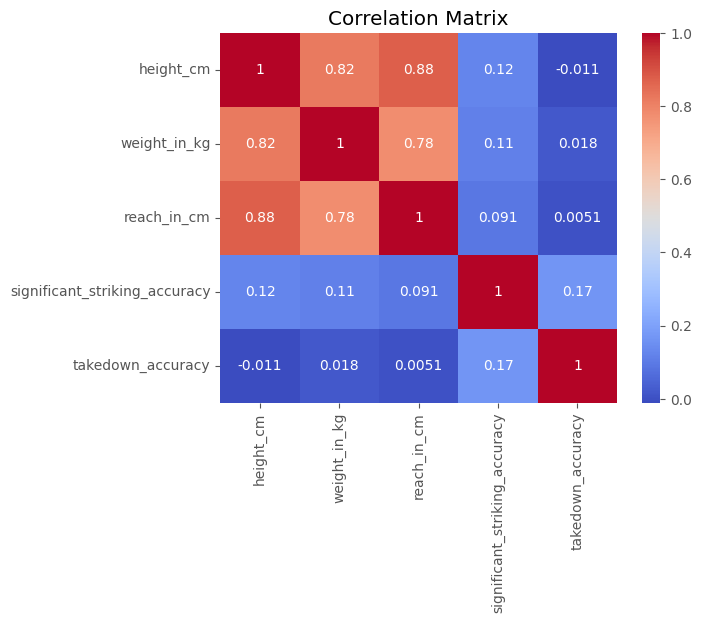

In [70]:
#Correlation Matrix
corr = df[['height_cm', 'weight_in_kg', 'reach_in_cm','significant_striking_accuracy','takedown_accuracy']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

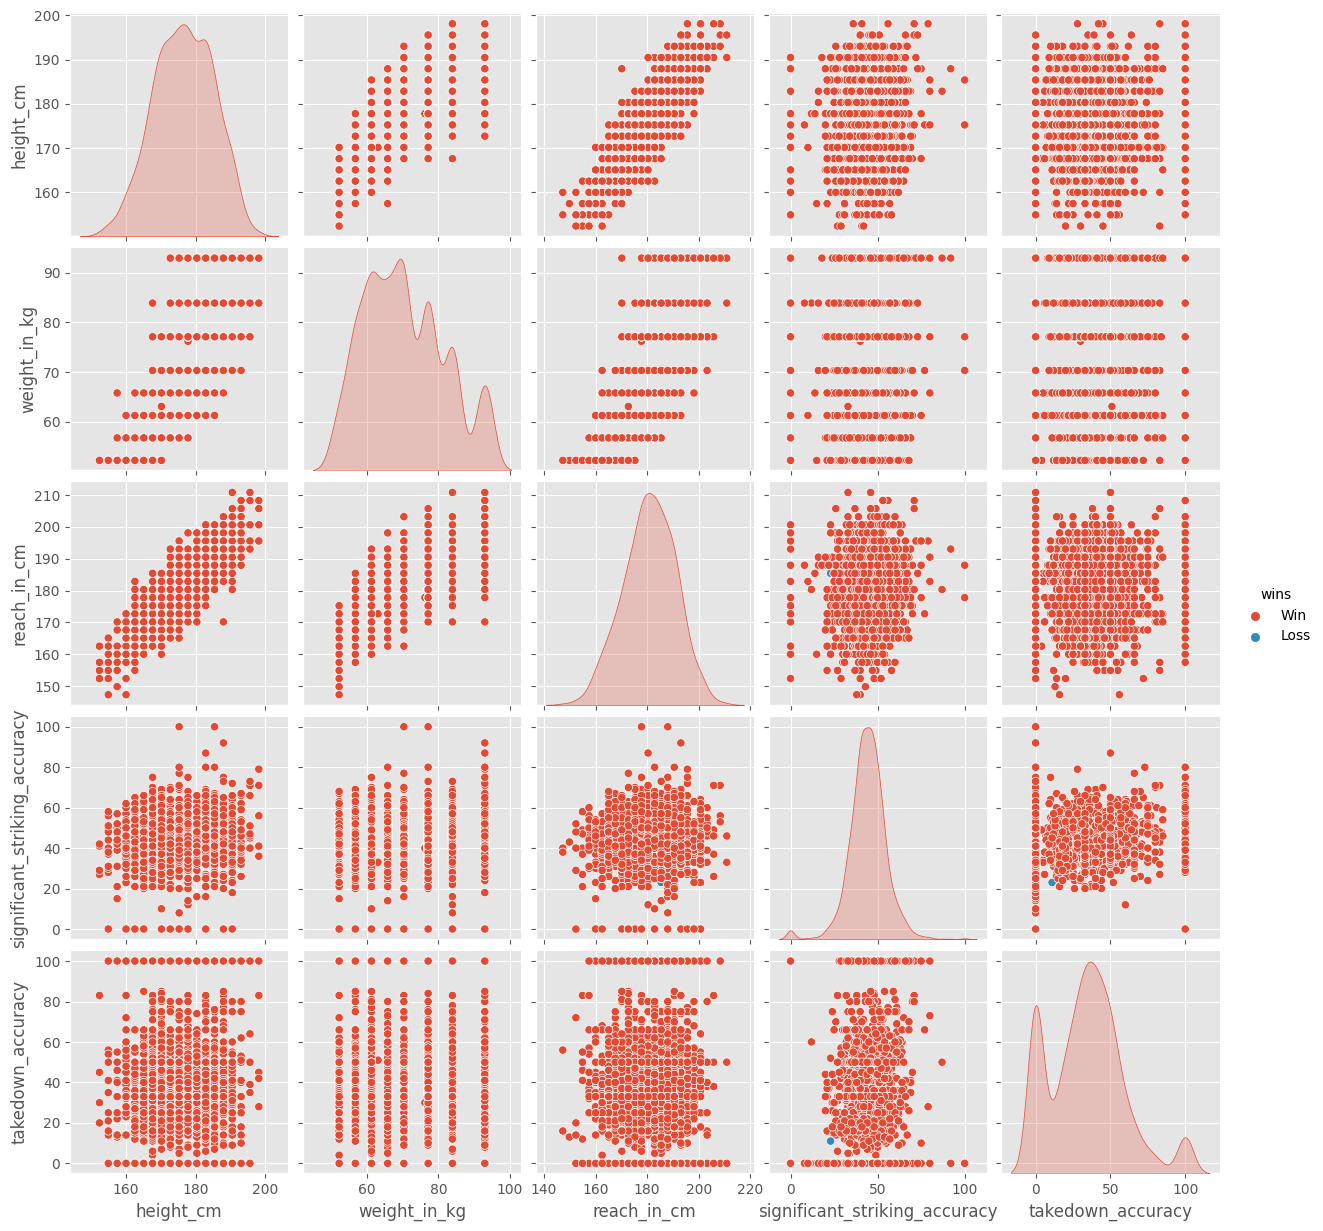

In [84]:
#all relations
sns.pairplot(df,
             vars=['height_cm', 'weight_in_kg', 'reach_in_cm','significant_striking_accuracy','takedown_accuracy'],
            hue='wins')
plt.show()

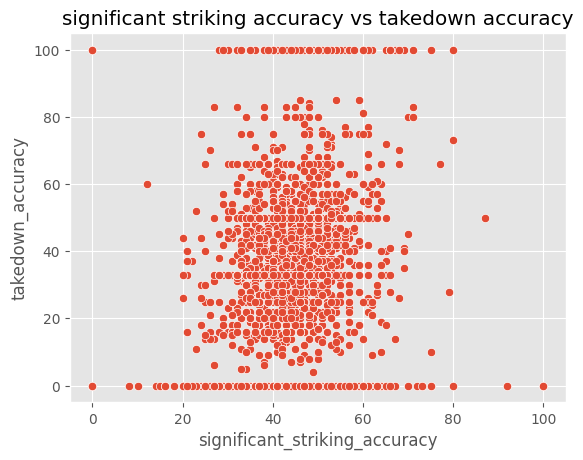

In [93]:
#significant striking accuracy vs takedown accuracy
sns.scatterplot(x=df['significant_striking_accuracy'], y=df['takedown_accuracy'])
plt.title('significant striking accuracy vs takedown accuracy')
plt.show()

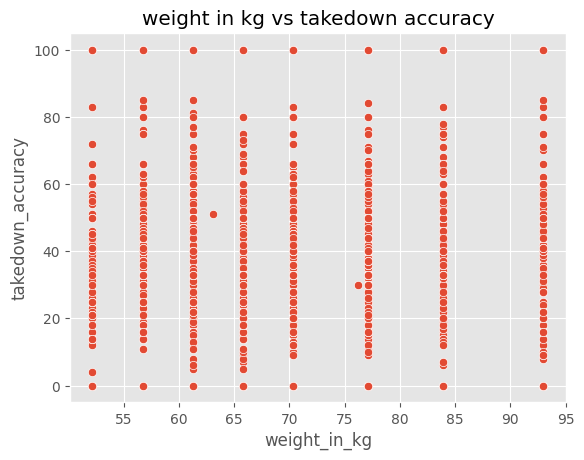

In [94]:
#weight in kg vs takedown accuracy
sns.scatterplot(x=df['weight_in_kg'], y=df['takedown_accuracy'])
plt.title('weight in kg vs takedown accuracy')
plt.show()

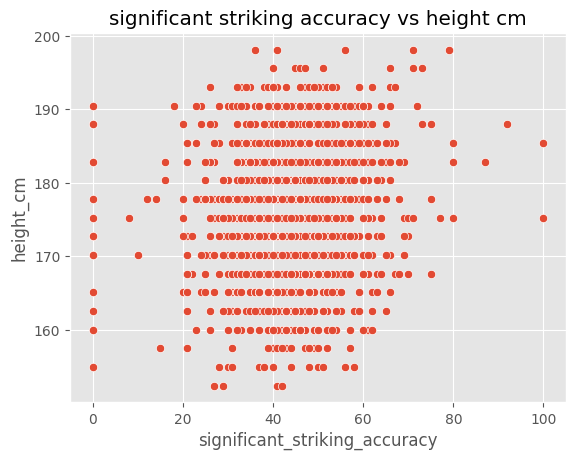

In [95]:
#significant_striking_accuracy vs height_cm
sns.scatterplot(x=df['significant_striking_accuracy'], y=df['height_cm'])
plt.title('significant striking accuracy vs height cm')
plt.show()

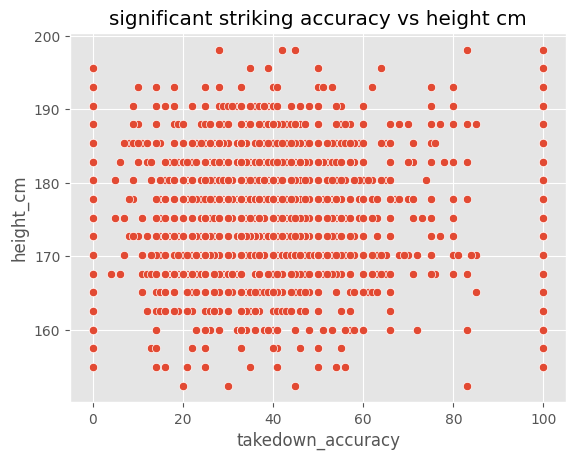

In [96]:
#significant_striking_accuracy vs height_cm
sns.scatterplot(x=df['takedown_accuracy'], y=df['height_cm'])
plt.title('significant striking accuracy vs height cm')
plt.show()

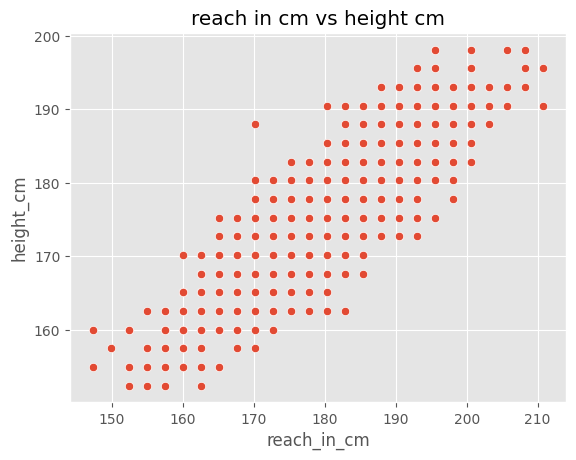

In [97]:

#reach in cm vs height_cm
sns.scatterplot(x=df['reach_in_cm'], y=df['height_cm'])
plt.title('reach in cm vs height cm')
plt.show()